## import libraries

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import string
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import re
import tqdm
import seaborn as sns
from tensorflow.keras.layers import Dense, LSTM, Flatten, Embedding
import string
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from warnings import filterwarnings
from tensorflow.keras.utils import to_categorical
import nltk
from tensorflow.python.client import device_lib
from nltk.corpus import stopwords
nltk.download('stopwords')
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
device_lib.list_local_devices()

2022-09-21 12:26:25.333902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-21 12:26:25.402648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 12:26:25.502637: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 12:26:25.503471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13090702045132843536,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16149905408
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12748714849380442489
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [4]:
df = pd.read_csv('/kaggle/input/bbc-fulltext-and-category/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [5]:
df.isna().sum()

category    0
text        0
dtype: int64

In [6]:
df['text'] = df['text'].str.lower()

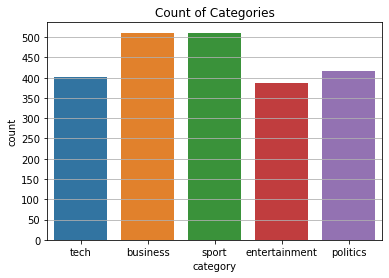

In [7]:
sns.countplot(df['category'])
plt.grid(True,axis='y')
plt.yticks(np.arange(0,550, 50))
plt.title('Count of Categories')
plt.show()

In [8]:
# train_test_split
x_train, x_test = train_test_split(df, random_state=1, test_size=0.2)
x_train.shape, x_test.shape

((1780, 2), (445, 2))

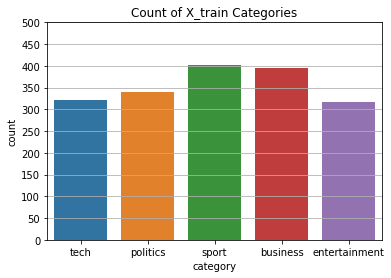

In [9]:
sns.countplot(x_train['category'])
plt.grid(True,axis='y')
plt.yticks(np.arange(0,550, 50))
plt.title('Count of X_train Categories')
plt.show()

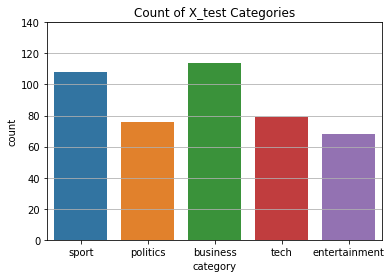

In [10]:
sns.countplot(x_test['category'])
plt.grid(True,axis='y')
plt.yticks(np.arange(0, 150, 20))
plt.title('Count of X_test Categories')
plt.show()

In [11]:
y_train = x_train['category']
x_train = x_train['text']

In [12]:
y_test = x_test['category']
x_test =x_test['text']

In [13]:
x_train

331     cebit fever takes over hanover thousands of pr...
190     kinnock to urge reform in lords neil kinnock h...
309     iraq advice claim sparks new row the tories sa...
1226    jol joy at  professional  cup win tottenham ma...
1364    evil twin  fear for wireless net people using ...
                              ...                        
960     fed warns of more us rate rises the us looks s...
905     bets off after big brother  leak  a bookmaker ...
1096    internet boom for gift shopping cyberspace is ...
235     consumer spending lifts us growth us economic ...
1061    t in the park sells out in days tickets for sc...
Name: text, Length: 1780, dtype: object

In [14]:
y_train

331              tech
190          politics
309          politics
1226            sport
1364             tech
            ...      
960          business
905     entertainment
1096             tech
235          business
1061    entertainment
Name: category, Length: 1780, dtype: object

In [15]:
def remove_punch(data):
    cleaned_data = []
    for sentences in data:
        new_sentence = sentences.translate(str.maketrans('','',string.punctuation))
        new_sentence = re.sub(r"[\n\t]*", "", new_sentence)
        new_sentence = re.sub('  ', "", new_sentence)

        cleaned_data.append(new_sentence)
    return np.array(cleaned_data)

In [16]:
removed_punch_x_train = remove_punch(x_train)
x_train.shape, removed_punch_x_train.shape

((1780,), (1780,))

In [17]:
removed_punch_x_test = remove_punch(x_test)
x_test.shape, removed_punch_x_test.shape

((445,), (445,))

In [18]:
x_test

1664    blues slam blackburn over savage birmingham ha...
1347    mps tout lords replacement plan a group of mps...
432     england 17-18 france england suffered an eight...
1435    banker loses sexism claim a former executive a...
1374    eu software patent law faces axe the european ...
                              ...                        
1060    apple ipod family expands market apple has exp...
464     metlife buys up citigroup insurer us banking g...
1494    brit awards for devon music acts devon singer ...
2058    new media battle for bafta awards the bbc lead...
1358    player burn-out worries robinson england coach...
Name: text, Length: 445, dtype: object

In [19]:
x_test[1664][:350], '........................',removed_punch_x_test[0][:350]

('blues slam blackburn over savage birmingham have confirmed blackburn made a bid for robbie savage - but managing director karen brady has called it  derisory .  rovers have reportedly offered £500 000 up front for the wales star  30  with the fee rising to £2.2m. but brady told the sun the bid was  a waste of fax paper and my time . she added:  the',
 '........................',
 'blues slam blackburn over savage birmingham have confirmed blackburn made a bid for robbie savagebut managing director karen brady has called itderisory rovers have reportedly offered £500 000 up front for the wales star30with the fee rising to £22m but brady told the sun the bid wasa waste of fax paper and my timeshe addedthe way things are going ')

In [20]:
print(f'train: {removed_punch_x_train.shape},\ntest:, {removed_punch_x_test.shape}')

train: (1780,),
test:, (445,)


In [21]:
def text_vizual(category,data_train):
    text = ''
    for txt in tqdm.tqdm(data_train[y_train==f'{category}']):
        text +=txt
    wordcloud_spam = WordCloud(background_color="white").generate(text)
    # Lines 2 - 5
    plt.figure(figsize = (15,15))
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'The most used words of category {category}')
    plt.show()

100%|██████████| 322/322 [00:00<00:00, 10847.05it/s]


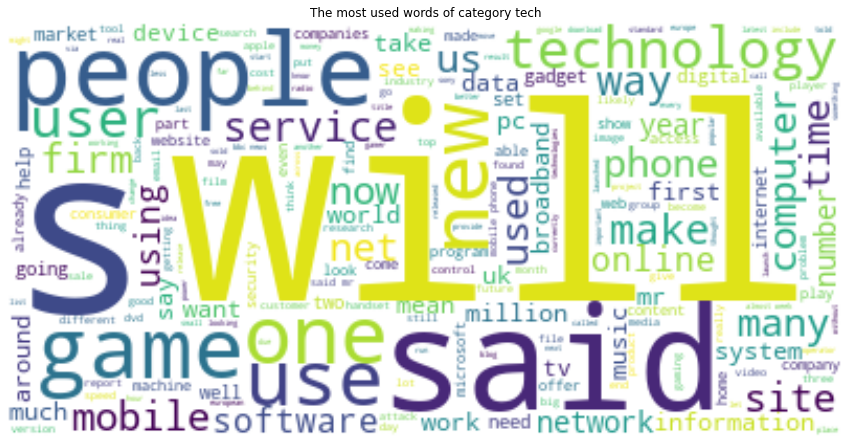

In [22]:
text_vizual('tech', removed_punch_x_train)

100%|██████████| 396/396 [00:00<00:00, 13261.56it/s]


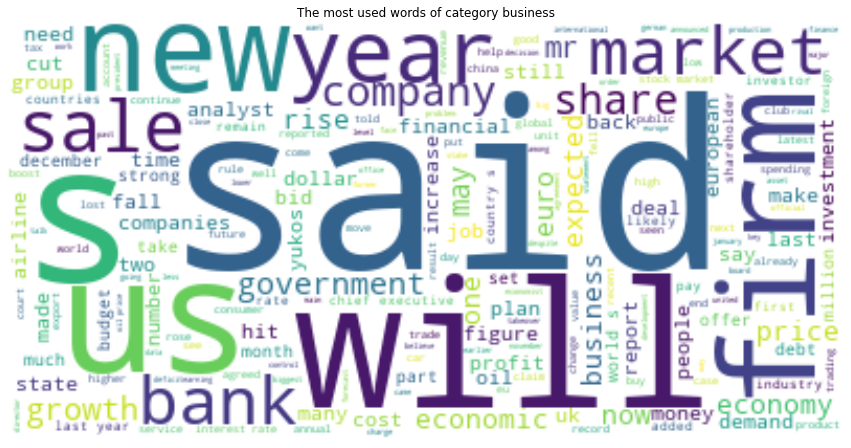

In [23]:
text_vizual('business', removed_punch_x_train)

## removing stop words

In [24]:
def remove_stop_words(data):
    cleaned_data = []
    for sentences in data:       
        tokenized = word_tokenize(sentences, 'english')
        new_sentence =  [token for token in tokenized  if token not in  stopwords.words('english')]
        sent = ''
        for text in new_sentence:
            sent+=text + ' '
        cleaned_data.append(sent)
    return np.array(cleaned_data)

In [25]:
cleaned_x_train = remove_stop_words(removed_punch_x_train)

In [26]:
cleaned_x_test = remove_stop_words(removed_punch_x_test)

In [27]:
cleaned_x_train.shape, cleaned_x_test.shape

((1780,), (445,))

## vizualizing cleaned text 

100%|██████████| 322/322 [00:00<00:00, 18473.32it/s]


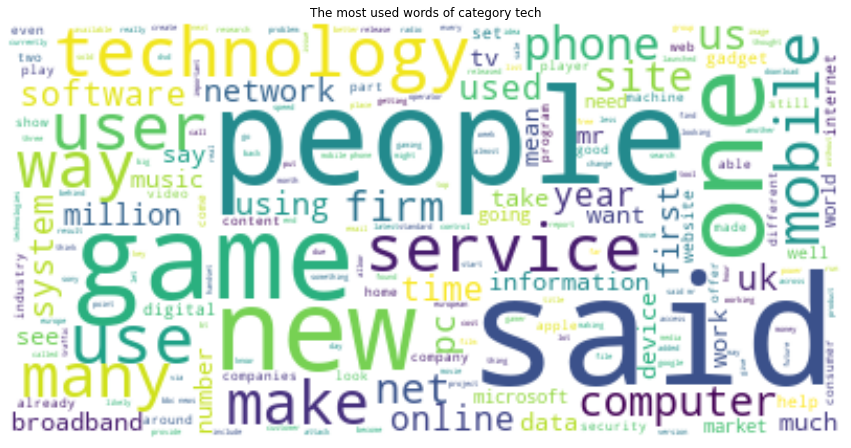

In [28]:
text_vizual('tech', cleaned_x_train)

## before removing stopwords 

100%|██████████| 322/322 [00:00<00:00, 11536.89it/s]


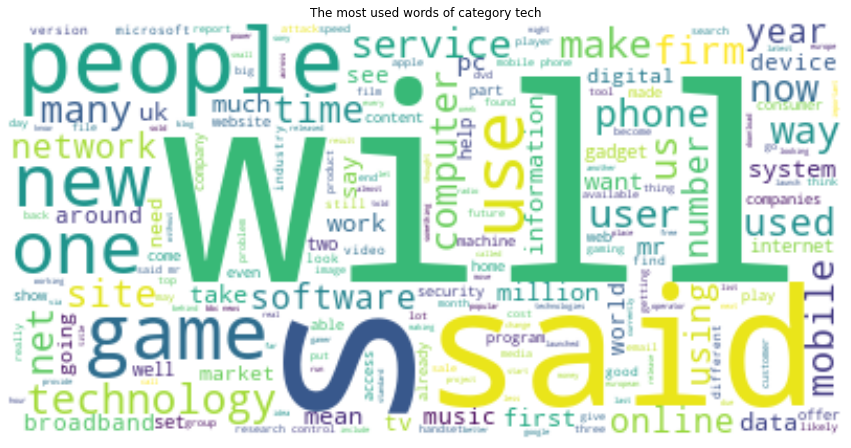

In [29]:
text_vizual('tech', removed_punch_x_train)

## label encode target features

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [32]:
le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [33]:
y_train = le.transform(y_train)
y_test =  le.transform(y_test)

In [34]:
y_train = to_categorical(y_train,5)
y_test = to_categorical(y_test,5)

## Tokenize

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
tokenizer = Tokenizer()

In [37]:
allDocs = list(cleaned_x_train) + list(cleaned_x_test)
tokenizer.fit_on_texts(allDocs)

In [38]:
tokenizer.document_count

2225

In [39]:
document_count = tokenizer.document_count
vocab_size = len(tokenizer.word_index)
print(f'document_count: {document_count}\nvocab_size: {vocab_size}')

document_count: 2225
vocab_size: 70804


In [40]:
allDocs_sequence = tokenizer.texts_to_sequences(allDocs)
max_length = max([ len(x) for x in allDocs_sequence])
max_length

2165

In [41]:
train_sequences = tokenizer.texts_to_sequences(list(cleaned_x_train))
test_sequences = tokenizer.texts_to_sequences(list(cleaned_x_test))

In [42]:
# pad the sequences
train_padded = pad_sequences(train_sequences,padding='post', truncating = 'post', maxlen = max_length )
test_padded = pad_sequences(test_sequences,padding='post', truncating = 'post', maxlen = max_length )

In [43]:
train_padded.shape

(1780, 2165)

In [44]:
train_padded

array([[ 4761, 12364,   643, ...,     0,     0,     0],
       [ 4107,  5016,  1231, ...,     0,     0,     0],
       [  566,  1290,   523, ...,     0,     0,     0],
       ...,
       [  198,  3247,  5034, ...,     0,     0,     0],
       [  348,   261,  4219, ...,     0,     0,     0],
       [ 1203,  5575,   284, ...,     0,     0,     0]], dtype=int32)

In [45]:
test_padded.shape

(445, 2165)

In [46]:
train_padded

array([[ 4761, 12364,   643, ...,     0,     0,     0],
       [ 4107,  5016,  1231, ...,     0,     0,     0],
       [  566,  1290,   523, ...,     0,     0,     0],
       ...,
       [  198,  3247,  5034, ...,     0,     0,     0],
       [  348,   261,  4219, ...,     0,     0,     0],
       [ 1203,  5575,   284, ...,     0,     0,     0]], dtype=int32)

In [47]:
train_padded.shape

(1780, 2165)

## Model

In [48]:
class Model(tf.keras.Model):
    def __init__(self, num_classes, shape):
        super().__init__()
        self.embedding = Embedding(vocab_size+1,num_classes, input_length=  max_length, name = 'embedded')
        self.lstm = LSTM(20,activation=tf.nn.tanh, return_sequences=True)
        self.flatten = Flatten()
        self.dense1 = Dense(32, activation='relu')
        self.output_dense = Dense(num_classes, activation= 'softmax')
    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.lstm(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.output_dense(x)
model = Model(len(df['category'].unique()), train_padded.shape)

2022-09-21 12:28:23.997590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 12:28:23.998849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 12:28:23.999909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 12:28:24.001109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 12:28:24.002147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [49]:
model.compile(optimizer='adam',metrics = 'accuracy', loss = tf.keras.losses.CategoricalCrossentropy())

In [50]:
history  = model.fit(train_padded, y_train, epochs = 5)

2022-09-21 12:28:24.524716: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-09-21 12:28:26.999927: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


56/56 [==============================] - 7s 64ms/step - loss: 1.4636 - accuracy: 0.3640
Epoch 2/5
56/56 [==============================] - 4s 65ms/step - loss: 0.6976 - accuracy: 0.6916
Epoch 3/5
56/56 [==============================] - 4s 64ms/step - loss: 0.2202 - accuracy: 0.9174
Epoch 4/5
56/56 [==============================] - 4s 64ms/step - loss: 0.0313 - accuracy: 0.9944
Epoch 5/5
56/56 [==============================] - 4s 64ms/step - loss: 0.0071 - accuracy: 0.9983


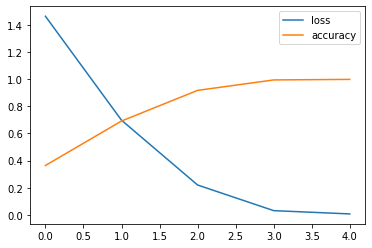

In [51]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [52]:
test_pred = model.predict(test_padded, verbose = 1)

14/14 [==============================] - 1s 28ms/step


In [53]:
test_pred.argmax(axis=1)

array([3, 2, 3, 0, 4, 1, 0, 3, 1, 4, 1, 2, 0, 4, 2, 2, 0, 4, 0, 1, 0, 0,
       0, 2, 1, 4, 3, 4, 3, 4, 0, 3, 1, 3, 0, 4, 3, 0, 2, 0, 4, 0, 0, 4,
       4, 0, 2, 1, 0, 4, 3, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1, 0, 3, 3, 3, 4,
       0, 2, 1, 2, 0, 2, 0, 4, 0, 4, 4, 2, 3, 0, 0, 4, 1, 4, 1, 1, 0, 1,
       3, 1, 0, 2, 4, 3, 3, 0, 4, 3, 3, 3, 4, 0, 3, 2, 0, 1, 1, 0, 0, 1,
       1, 4, 1, 1, 1, 3, 3, 0, 3, 0, 4, 3, 0, 0, 4, 4, 3, 2, 3, 2, 0, 3,
       0, 4, 0, 2, 1, 2, 1, 0, 0, 3, 0, 4, 4, 2, 0, 3, 4, 2, 2, 3, 1, 0,
       4, 0, 3, 4, 1, 2, 3, 3, 1, 3, 4, 3, 2, 4, 4, 4, 0, 1, 4, 3, 2, 0,
       3, 0, 1, 0, 3, 4, 1, 1, 2, 0, 0, 2, 1, 3, 3, 4, 0, 1, 3, 1, 1, 3,
       2, 2, 2, 1, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 2, 1,
       0, 2, 1, 3, 1, 3, 3, 0, 2, 1, 1, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 1,
       2, 2, 3, 0, 2, 3, 3, 1, 3, 2, 1, 0, 1, 3, 3, 4, 4, 3, 0, 2, 3, 3,
       4, 2, 3, 1, 2, 3, 1, 1, 0, 4, 1, 0, 0, 1, 0, 3, 3, 3, 0, 3, 2, 4,
       3, 3, 2, 3, 2, 2, 0, 3, 0, 3, 0, 1, 4, 0, 4,

In [54]:
print(classification_report(y_test.argmax(axis=1), test_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       114
           1       0.77      0.97      0.86        68
           2       0.88      0.78      0.83        76
           3       1.00      0.94      0.97       108
           4       0.95      0.89      0.92        79

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.92      0.91      0.92       445



In [55]:
test_padded

array([[ 2544,  1166,  3092, ...,     0,     0,     0],
       [  517, 24080,   889, ...,     0,     0,     0],
       [   64, 62358,   259, ...,     0,     0,     0],
       ...,
       [ 2967,   282,  5319, ...,     0,     0,     0],
       [    5,   190,   715, ...,     0,     0,     0],
       [  243, 19208,  2652, ...,     0,     0,     0]], dtype=int32)

In [56]:
y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [57]:
le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [58]:
rnd = np.random.randint(0, len(test_padded))
test_single_data = test_padded[rnd]
y_single_data = y_test[rnd]
print(test_single_data)
print("*"*50)
print(y_single_data)
print(f'real_class: {le.classes_[y_single_data.reshape(1,-1).argmax(axis=1)[0]]}')
print(f'class_index: {y_single_data.reshape(1,-1).argmax(axis=1)[0]}')

[ 5675 68348  1661 ...     0     0     0]
**************************************************
[0. 0. 0. 1. 0.]
real_class: sport
class_index: 3


In [59]:
test_single_data_reshaped = test_single_data.reshape(1,2165)

In [60]:
single_predicted = model.predict(test_single_data_reshaped, verbose= 1)
single_predicted.argmax(axis=1)

1/1 [==============================] - 0s 40ms/step


array([3])

**sport = 3 true prediction**

In [62]:
model.save("text_categorization_model", save_format='tf')

2022-09-21 12:30:28.799852: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
